## Ejercicio 1

In [ ]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
class Graph:
  def __init__(self, nodes):
    self.graph = defaultdict(dict)
    self.nodes = nodes
    self.node_map = {node: i for i, node in enumerate(nodes)}
    self.reverse_node_map = {i: node for i, node in enumerate(nodes)}
    self.graph_matrix = [[0] * len(nodes) for _ in range(len(nodes))]

  def add_edge(self, u, v, capacity):
        u_idx = self.node_map[u]
        v_idx = self.node_map[v]
        self.graph_matrix[u_idx][v_idx] = capacity


  def bfs(self, s, t, parent):
        visited = [False] * len(self.nodes)
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)
            for ind in range(len(self.nodes)):
                if visited[ind] is False and self.graph_matrix[u][ind] > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

  def ford_fulkerson(self, source, sink):
        source_idx = self.node_map[source]
        sink_idx = self.node_map[sink]

        parent = [-1] * len(self.nodes)
        max_flow = 0

        while self.bfs(source_idx, sink_idx, parent):
            path_flow = float("Inf")
            s = sink_idx
            while(s != source_idx):
                path_flow = min(path_flow, self.graph_matrix[parent[s]][s])
                s = parent[s]

            max_flow += path_flow
            v = sink_idx
            while(v != source_idx):
                u = parent[v]
                self.graph_matrix[u][v] -= path_flow
                self.graph_matrix[v][u] += path_flow
                v = parent[v]

        return max_flow


In [ ]:
nodos = ['A', 'B', 'C', 'D', 'E', 'F']
capacidades = [
    ('A', 'B', 10), ('A', 'C', 15), ('B', 'C', 2), ('B', 'D', 4),
    ('B', 'E', 8), ('C', 'E', 9), ('D', 'F', 10), ('E', 'D', 16),
    ('E', 'F', 10)
]

g = Graph(nodos)
for u, v, capacidad in capacidades:
    g.add_edge(u, v, capacidad)

inicio = 'A'
destino = 'F'
flujo_maximo = g.ford_fulkerson(inicio, destino)
print(f"Flujo maximo desde {inicio} hasta {destino}: {flujo_maximo}")

Flujo maximo desde A hasta F: 19


## Ejercicio 2

In [ ]:
nodos_ej_2 = ['s', '1', '2', '3', '4', '5', 't']
capacidades_ej2 = [
    ('s', '1', 8), ('s', '3', 5), ('s', '2', 9),
    ('1', '4', 6), ('3', '1', 4), ('2', '3', 7),
    ('3', '4', 2), ('3', '5', 6), ('2', '5', 5),
    ('4', '5', 4), ('4', 't', 11), ('5', 't', 13)
]

g2 = Graph(nodos_ej_2)
for u, v, capacidad in capacidades_ej2:
    g2.add_edge(u, v, capacidad)


inicio_2 = 's'
destino_2 = 't'
flujo_maximo_2 = g2.ford_fulkerson(inicio_2, destino_2)
print(f"Flujo maximo desde {inicio_2} hasta {destino_2}: {flujo_maximo_2}")

Flujo maximo desde s hasta t: 19


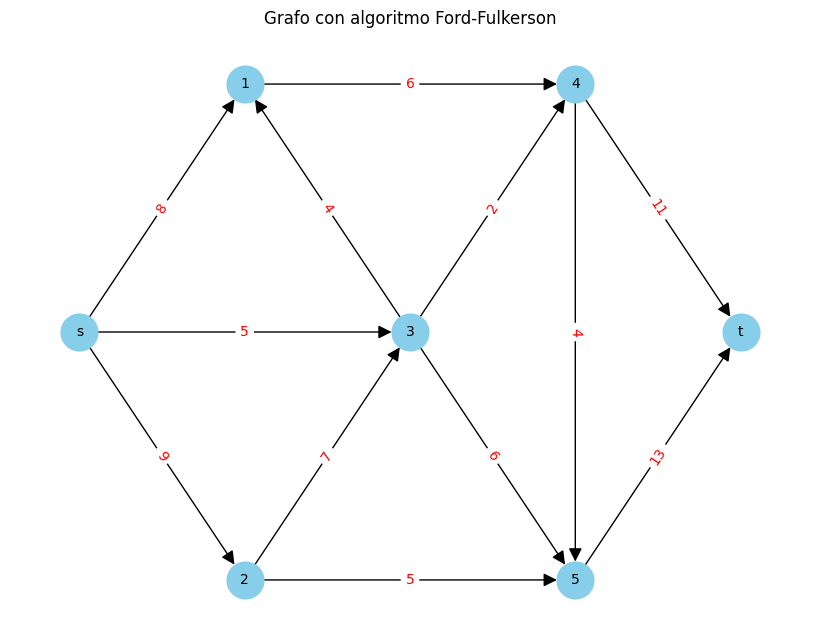

In [ ]:
# Representacion de la corrida
G_nx = nx.DiGraph()

for u, v, capacidad in capacidades_ej2:
    G_nx.add_edge(u, v, capacity=capacidad)

pos = {
    's': (0, 0),
    '1': (1, 1),
    '2': (1, -1),
    '3': (2, 0),
    '4': (3, 1),
    '5': (3, -1),
    't': (4, 0)
}

plt.figure(figsize=(8, 6))
nx.draw(G_nx, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, arrowsize=20)

edge_labels = nx.get_edge_attributes(G_nx, 'capacity')
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels, font_color='red')

plt.title("Grafo con algoritmo Ford-Fulkerson")
plt.show()
